In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pathlib
#from pathlib import Path

In [55]:
pathlib.ls = lambda self: list(self.glob('*'))
# Path.ls = lambda self: list(self.glob('*'))

In [56]:
# ipynb code in the absolute directory
# input files should be found in the 'input' directory
PATH = pathlib.Path('input')#; PATH.glob('**/*')
list(PATH.iterdir())
#files = [x for x in PATH if x.is_file()]
# PATH = Path('../projects/recognizing-faces-in-the-wild/input'); PATH.ls()

[WindowsPath('input/sample_submission.csv'),
 WindowsPath('input/test-faces.zip'),
 WindowsPath('input/test-private-faces.zip'),
 WindowsPath('input/test-private-labels.zip'),
 WindowsPath('input/test-private-lists.zip'),
 WindowsPath('input/test-public-faces.zip'),
 WindowsPath('input/test-public-lists.zip'),
 WindowsPath('input/test.zip'),
 WindowsPath('input/train'),
 WindowsPath('input/train-faces'),
 WindowsPath('input/train-faces.zip'),
 WindowsPath('input/train.zip'),
 WindowsPath('input/train_relationships.csv')]

In [18]:
relationship_df = pd.read_csv(PATH/'train_relationships.csv')
relationship_df.head(10)

,p1,p2
0,F0002/MID1,F0002/MID3
1,F0002/MID2,F0002/MID3
2,F0005/MID1,F0005/MID2
3,F0005/MID3,F0005/MID2
4,F0009/MID1,F0009/MID4
5,F0009/MID1,F0009/MID3
6,F0009/MID1,F0009/MID2
7,F0009/MID1,F0009/MID6
8,F0009/MID2,F0009/MID4
9,F0009/MID2,F0009/MID6


In [36]:
def ceiling(x, y):
    z = math.ceil(x/y)
    if (z*y == x):
        z
    else:
        z+=1
    
    return z

def plot_image(path, ID, row=3):
    figure = plt.figure(figsize=(10, 10))
    for i, id in enumerate(ID):
        ax = figure.add_subplot(row, ceiling(len(ID), row), i+1)
        ax.axis('off')
        imdata = plt.imread(path/id)
        plt.imshow(imdata)
        plt.title(label=id)    

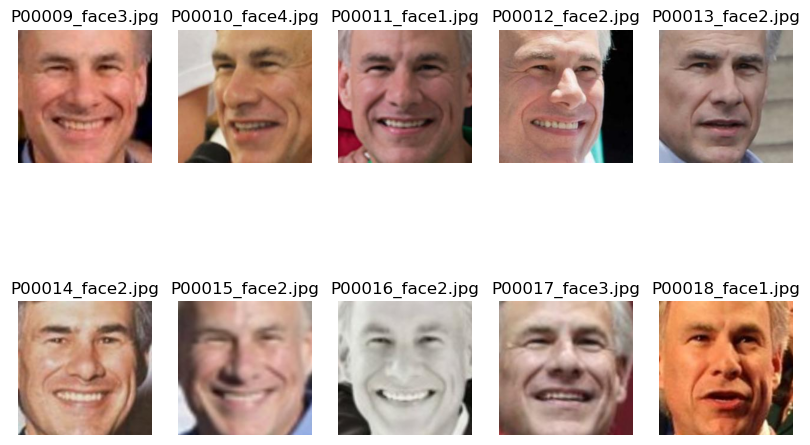

In [37]:
F0002_MID1 = (PATH/'train-faces'/'F0002/MID1')
imgs = list(map(lambda p: p.name, F0002_MID1.iterdir()))
plot_image(F0002_MID1, imgs)

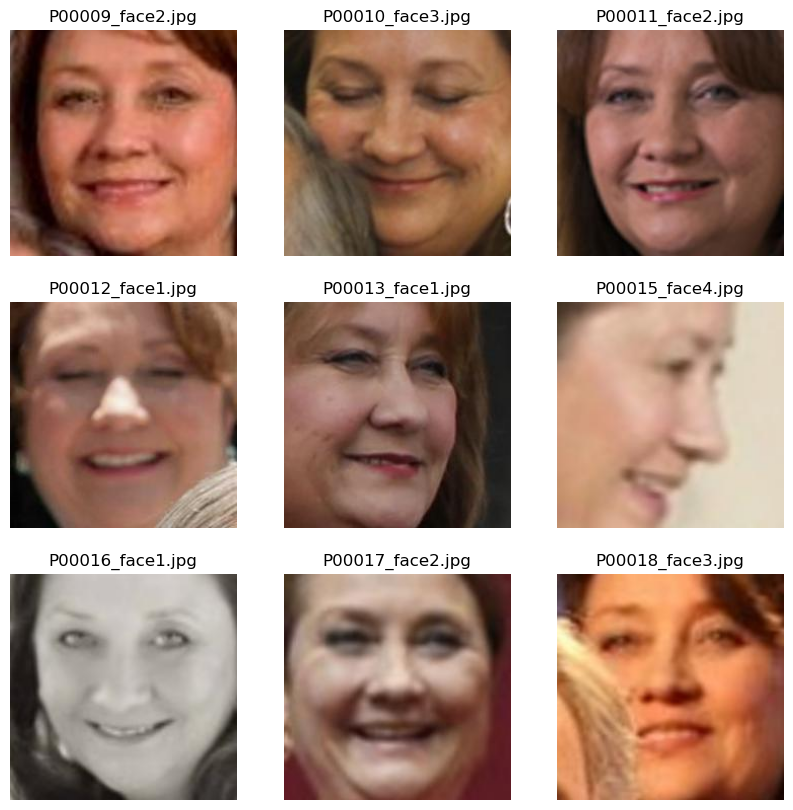

In [38]:
F0002_MID2 = (PATH/'train-faces'/'F0002/MID2')
imgs = list(map(lambda p: p.name, F0002_MID2.iterdir()))
plot_image(F0002_MID2, imgs)

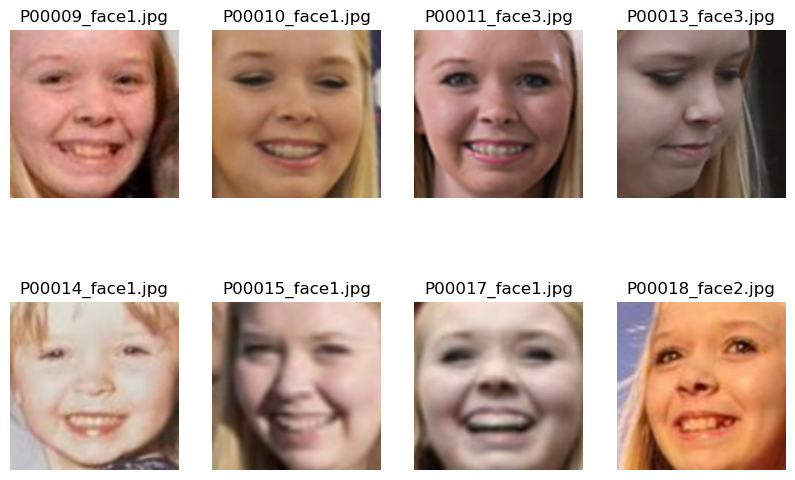

In [39]:
F0002_MID3 = (PATH/'train-faces'/'F0002/MID3')
imgs = list(map(lambda p: p.name, F0002_MID3.iterdir()))
plot_image(F0002_MID3, imgs)

array([[<Axes: title={'center': 'p2'}>]], dtype=object)

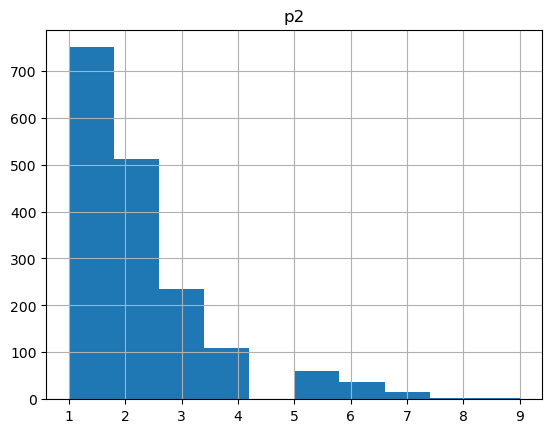

In [42]:
relationship_df.groupby('p1').count().hist()

array([[<Axes: title={'center': 'p1'}>]], dtype=object)

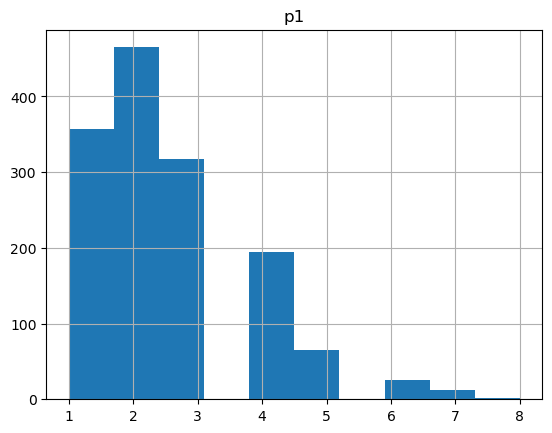

In [43]:
relationship_df.groupby('p2').count().hist()

In [44]:
counts = 2
counts_df = relationship_df.groupby('p1').agg({'p2': 'count'})
counts_mask = counts_df['p2']>counts
img_ids = counts_mask.axes[0].values
img_ids[:10]

array(['F0002/MID1', 'F0002/MID2', 'F0005/MID1', 'F0005/MID3',
       'F0009/MID1', 'F0009/MID2', 'F0009/MID3', 'F0009/MID4',
       'F0009/MID5', 'F0009/MID7'], dtype=object)

In [48]:
!pip3 install opencv-python

import zipfile
import cv2
import tqdm

In [60]:
import shutil
import os
# C:\Users\edgarala\OneDrive - Intel Corporation\Documents\Intel\AI\Deep_Learning\projects\recognizing-faces-in-the-wild
home = str(PATH.home())
print("HOME_FOLDER is ", home)

if not os.path.exists(home + "/OneDrive - Intel Corporation/Documents/Intel/AI/Deep_Learning/projects/recognizing-faces-in-the-wild/deepface"):
    os.makedirs(home + "/OneDrive - Intel Corporation/Documents/Intel/AI/Deep_Learning/projects/recognizing-faces-in-the-wild/deepface")

if not os.path.exists(home + "/OneDrive - Intel Corporation/Documents/Intel/AI/Deep_Learning/projects/recognizing-faces-in-the-wild/deepface/weights"):
    os.makedirs(home + "/OneDrive - Intel Corporation/Documents/Intel/AI/Deep_Learning/projects/recognizing-faces-in-the-wild/deepface/weights")



HOME_FOLDER is  C:\Users\edgarala


In [61]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [63]:
TRAIN_ZIP = '../recognizing-faces-in-the-wild/input/train.zip'
TEST_ZIP='../recognizing-faces-in-the-wild/input/test.zip'

In [64]:
print("unzipping train set")
with zipfile.ZipFile(TRAIN_ZIP, 'r') as zip_ref:
    zip_ref.extractall("../output/kaggle/working/train")

print("unzipping test set")
with zipfile.ZipFile(TEST_ZIP, 'r') as zip_ref:
    zip_ref.extractall("../output/kaggle/working/test")

unzipping train set
unzipping test set


In [65]:
def findCustomImages(path):
    images = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            images.append(os.path.join(dirname, filename))
    
    return images

In [67]:
root = "../output/kaggle/working/train/"

samples = []
for index, instance in relationship_df.iterrows():
    person1 = root+instance.p1
    person2 = root+instance.p2
    
    person1_images = findCustomImages(person1)
    person2_images = findCustomImages(person2)
    
    for i in person1_images:
        for j in person2_images:
            sample = []
            sample.append(i)
            sample.append(j)
            samples.append(sample)

In [68]:
df = pd.DataFrame(samples, columns = ["p1", "p2"])

In [69]:
df.head()

,p1,p2
0,../output/kaggle/working/train/F0002/MID1\P000...,../output/kaggle/working/train/F0002/MID3\P000...
1,../output/kaggle/working/train/F0002/MID1\P000...,../output/kaggle/working/train/F0002/MID3\P000...
2,../output/kaggle/working/train/F0002/MID1\P000...,../output/kaggle/working/train/F0002/MID3\P000...
3,../output/kaggle/working/train/F0002/MID1\P000...,../output/kaggle/working/train/F0002/MID3\P000...
4,../output/kaggle/working/train/F0002/MID1\P000...,../output/kaggle/working/train/F0002/MID3\P000...


In [70]:
print("There are ",df.shape[0]," image pairs existing as a relative")

There are  165179  image pairs existing as a relative


In [10]:
#!pip install gdown==3.10.1 --no-deps
#!pip install mtcnn==0.1.0 --no-deps
#!pip install deepface==0.0.51 --no-deps
#!pip install tensorflow==2.15.1

!pip3 install gdown
!pip3 install mtcnn
!pip3 install deepface==0.0.86
#!pip3 install tensorflow==2.12

     ---------------------------------------- 0.0/87.2 kB ? eta -:--:--
     -------------- ------------------------- 30.7/87.2 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 87.2/87.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/87.8 kB ? eta -:--:--
   ---------------------------------------- 87.8/87.8 kB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.0 kB ? eta -:--:--
   ---------------------------------------- 85.0/85.0 kB 4.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114261 sha256=9fa62e3d540951856e35a890ded6af756300ea9aaa893111d91c2702d4185842
  Stored in directory: c:\users\edgarala\appdata\local\pip\cache\wheels\19\39\2f\2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
  Attempting uninstall: deepface
    Found existing installation: d

In [ ]:
from deepface import DeepFace

In [14]:
!pip3 install --upgrade numpy # upgrade to numpy-2.1.3

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 320.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 538.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.4/12.9 MB 8.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/12.9 MB 19.3 MB/s eta 0:00:01
   ----------- ---------------------------- 3.9/12.9 MB 27.2 MB/s eta 0:00:01
   ---------------- ----------------------- 5.4/12.9 MB 34.6 MB/s eta 0:00:01
   ----------------------- ---------------- 7.5/12.9 MB 34.4 MB/s eta 0:00:01
   -------------------------------- ------- 10.3/12.9 MB 38.5 MB/s eta 0:00:01
   ------------------------------------ --- 11.6/12.9 MB 43.7 MB/s eta 0:00:01
   ------------------------------------- -- 12.1/12.9 MB 34.4 MB/s eta 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 2.1.3 which is incompatible.


In [16]:
!pip3 install tensorflow==2.13

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.4.0 requires fsspec, which is not installed.
ipython 8.26.0 requires typing-extensions>=4.6; python_version < "3.12", but you have typing-extensions 4.5.0 which is incompatible.
torch 2.4.0 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.



   ---------------------------------------- 0.0/276.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/276.5 MB 5.3 MB/s eta 0:00:53
   ---------------------------------------- 1.0/276.5 MB 12.5 MB/s eta 0:00:23
   ---------------------------------------- 1.8/276.5 MB 14.4 MB/s eta 0:00:20
   ---------------------------------------- 2.1/276.5 MB 16.6 MB/s eta 0:00:17
   ---------------------------------------- 3.1/276.5 MB 16.7 MB/s eta 0:00:17
    --------------------------------------- 4.2/276.5 MB 15.7 MB/s eta 0:00:18
    --------------------------------------- 5.1/276.5 MB 15.5 MB/s eta 0:00:18
    --------------------------------------- 5.3/276.5 MB 14.0 MB/s eta 0:00:20
   - -------------------------------------- 7.3/276.5 MB 18.0 MB/s eta 0:00:15
   - -------------------------------------- 7.3/276.5 MB 18.0 MB/s eta 0:00:15
   - -------------------------------------- 8.4/276.5 MB 16.8 MB/s eta 0:00:17
   - -------------------------------------- 8.4/276.5 MB 15.